In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.style.use("fast")

In [3]:
raw_data = pd.read_csv("data/advertising.csv", index_col=False)
raw_data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [4]:
raw_data = raw_data.drop("Unnamed: 0", axis=1)
raw_data

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [5]:
Y = raw_data["sales"]
raw_data.drop(["sales"], axis=1, inplace=True)
X = raw_data["TV"]

Text(0.5, 0, 'Sales')

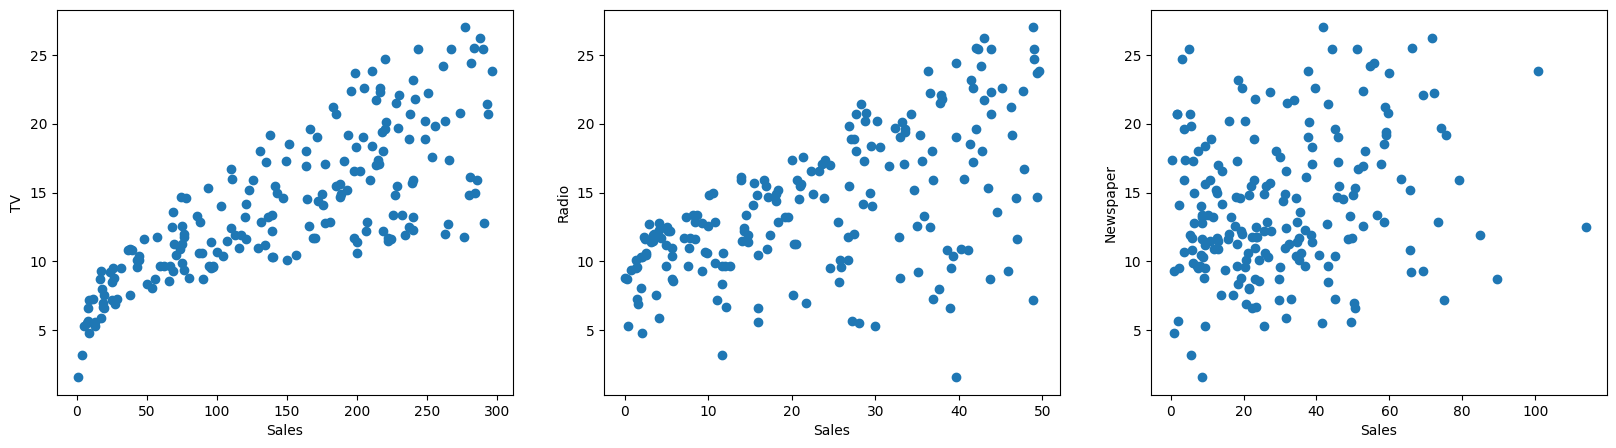

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

axs[0].scatter(raw_data["TV"], Y)
axs[0].set_ylabel("TV")
axs[0].set_xlabel("Sales")
axs[1].scatter(raw_data["radio"], Y)
axs[1].set_ylabel("Radio")
axs[1].set_xlabel("Sales")
axs[2].scatter(raw_data["newspaper"], Y)
axs[2].set_ylabel("Newspaper")
axs[2].set_xlabel("Sales")

Text(0.5, 1.0, 'Relation Between TV Advertisement and Sales')

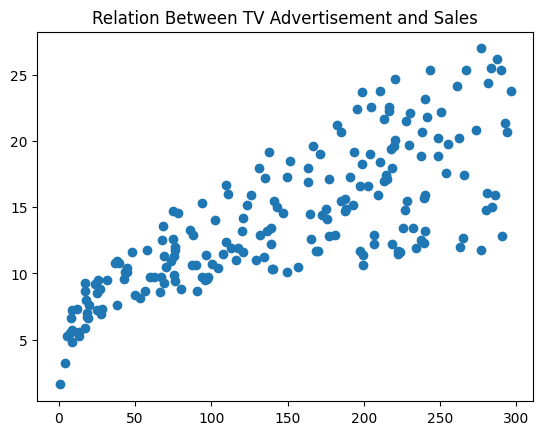

In [7]:
axs = plt.subplot()
axs.scatter(X, Y)
axs.set_title("Relation Between TV Advertisement and Sales")

In [8]:
meanY = Y.mean()
meanX = X.mean()

b0 = 0
b1 = 0
A, B = 0, 0

for i in range(200):
    Xi = X.loc[i]
    Yi = Y.loc[i]
    A += (Xi - meanX) * (Yi - meanY)
    B += pow(Xi - meanX, 2)

b1 = A / B
print("Slope (B0): ", b1)

b0 = meanY - (b1 * meanX)
print("Intercept (B1): ", b0)

Slope (B0):  0.04753664043301969
Intercept (B1):  7.032593549127704


In [9]:
prediction = []
for i in range(200):
    prediction.append((b0 + b1 * X[i]))
prediction = np.array(prediction)
prediction

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431,
       10.17476548, 17.23871025,  8.16396559, 11.66741599, 16.73482186,
       16.32125309, 10.25557777, 20.40940417, 10.32212907, 14.03474068,
       17.41459582, 18.31779199,  7.6600772 , 17.88520856,  9.99412625,
       19.52997632, 13.82557947, 18.44614092, 18.85970969, 10.38868036,
       20.95607553, 12.39948025, 11.653155  , 19.65832525, 11.58185004,
       20.85149492, 19.72012288, 10.58358059,  9.08142275, 17.87094757,
       16.65876324, 15.44657891, 20.98935118, 16.86792445,  8.22576322,
       15.35625929, 11.2966302 , 18.43663359, 17.83291826, 10.21279479,
       16.53041431, 11.80527225, 17.31952254, 15.71278409, 19.52046899,
       16.48763133,  7.37961102, 13.50708398, 17.05331735, 17.04856369,
        9.57580381, 19.45391769, 18.4081116 , 11.91460652, 13.26464711,
       10.31262174,  8.52999772, 13.65444756, 18.31779199, 17.33

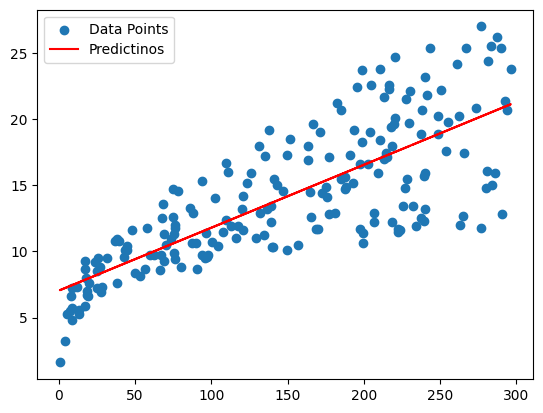

In [10]:
import matplotlib.animation as animation

fig, ax = plt.subplots()

ax.scatter(X, Y, label="Data Points")
ax.plot(X, prediction, color="r", label="Predictinos")

plt.legend()
plt.show()

In [11]:
def predict(X):
    y_hat = b0 + b1 * X
    return y_hat

In [12]:
tv_advertise_buedget = float(input("Budget for TV Advertisement(in thousand dollar):")) # in thousands of dollars
sales_unit = round(predict(tv_advertise_buedget), 2) # in thousands of units
print(f"For ${tv_advertise_buedget * 1000} TV Advertise Budget, {sales_unit * 1000} thousand units will be sold.")

Budget for TV Advertisement(in thousand dollar): 5


For $5000.0 TV Advertise Budget, 7270.0 thousand units will be sold.
